# A - PROJETO DE FILTROS FIR- Arthur Carlos de Faria- RA 0040421


#### Importando as bibliotecas necess√°rias

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.fft as fft

### Criando o sinal
#### ùë•(ùë°) = 1,5 sin(2ùúã(ùëé1 + 1)ùë°) ‚àí 3 sin(2ùúã(ùëé2 + 1)ùë°) + 2 sin(2ùúã(ùëé1 + ùëé2)t)
##### ùëé1 e ùëé2 s√£o o √∫ltimo e pen√∫ltimo n√∫mero do meu registro acad√™mico (40421), sendo que ùëé1 < ùëé2 e ùëé1 ‚â† ùëé2.
##### Portanto:
##### a1= 1
##### a2= 2
#### ùë•(ùë°) = 1,5 sin(4ùúãùë°) ‚àí 1 sin(6ùúãùë°) 


Sinal a ser tratado


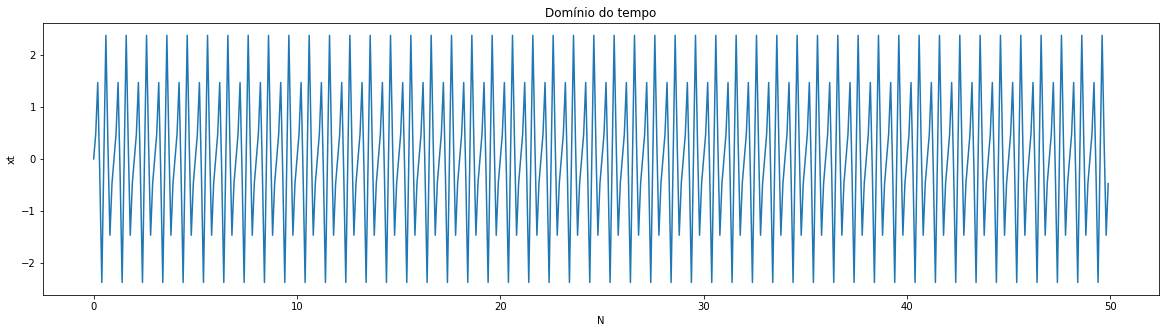

<ipython-input-81-5d114452a75f>:20: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  xfft=fft(xt)/len(xt)


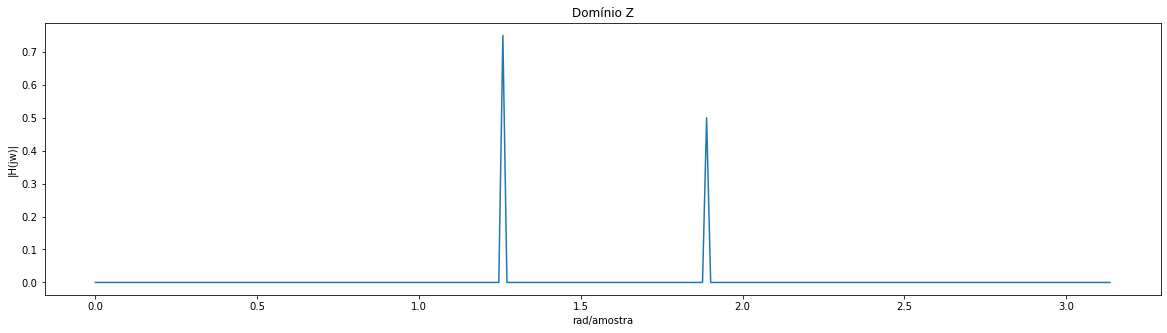

In [81]:
#RA 0040421
#a1 e ùëé2 s√£o o √∫ltimo e pen√∫ltimo n√∫mero do seu registro acad√™mico (RA), sendo que ùëé1 < ùëé2 e ùëé1 ‚â† ùëé2.
a1=1
a2=2
N=500
T=0.1

print("Sinal a ser tratado")
t=np.linspace(0,T*N-T,N)
ùë•t = 1.5*np.sin(2*np.pi*(ùëé1 + 1)*ùë°) - 3*np.sin(2*np.pi*(ùëé2 + 1)*ùë°) + 2* np.sin(2*np.pi*(ùëé1 + ùëé2)*ùë°)
plt.figure(figsize=(20,5))
plt.title("Dom√≠nio do tempo")

plt.ylabel("xt")
plt.xlabel("N")
plt.plot(t,xt)
plt.show()
plt.figure(figsize=(20,5))
freq=np.linspace(0,2*np.pi,N)
xfft=fft(xt)/len(xt)
plt.title("Dom√≠nio Z")
plt.ylabel("|H(jw)|")
plt.xlabel("rad/amostra")

plt.plot(freq[:N//2],np.abs(xfft[:N//2]))
plt.show()


#### a) Passa-altas (ùë¶ùëé): verificando os diferentes janelamentos;
As especifica√ß√µes foram feitas de modo que apenas a frequ√™ncia correspondente √† (ùëé1 + ùëé2)
apare√ßa na sa√≠da do filr num mesmo gr√°fico, no dom√≠nio do tempo, o sinal ‚Äúideal‚Äù.



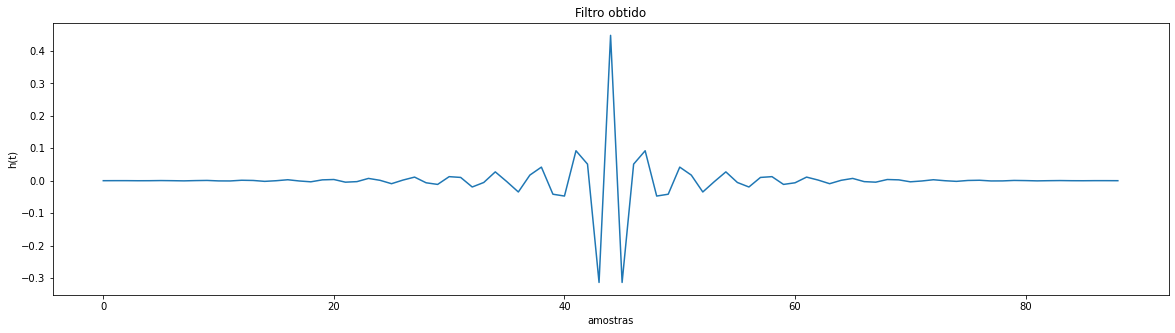

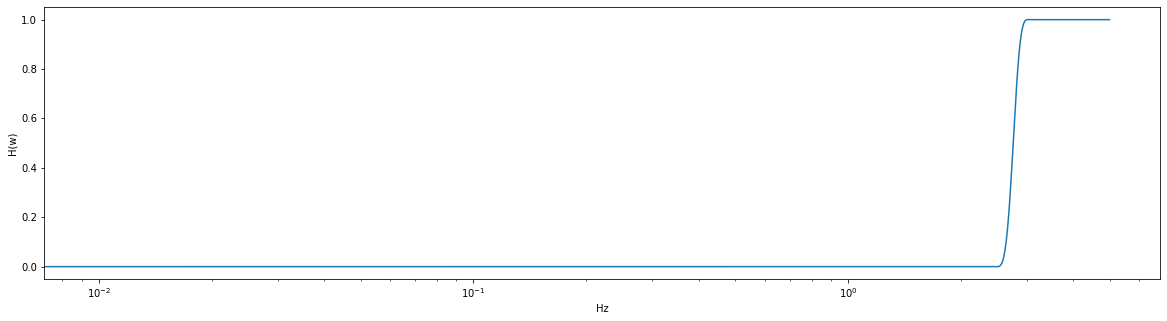

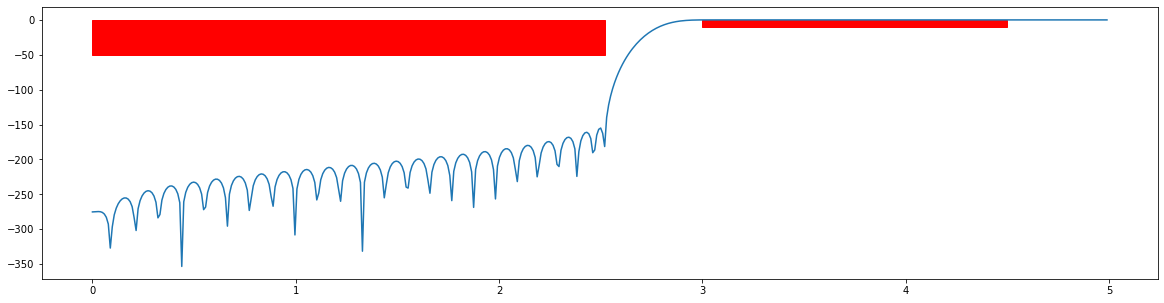

In [82]:
from  scipy import signal
from  scipy.signal import windows
from numpy import pi
Ap=0.1
Ar=50
Dr=10**(-0.05*Ar)
Dp=(10**(0.05*Ap-1))/(10**(-0.05*Ap+1))
beta=1
numtaps=89
Delta=min(Dr,20*np.log10(Dp))
wp=(a1+a2)*np.pi*2
wr=wp-3

wc1=np.mean((wp,wr))
Filtro=signal.firwin(numtaps,cutoff=wc1,width=(wp-wr), window='nuttall', pass_zero="highpass",scale=True,nyq=None,fs=(1/T)*np.pi*2)

w,H=signal.freqz(Filtro,fs=(1/T))
plt.figure(figsize=(20,5))
plt.ylabel("H(w)")
plt.xlabel("rad/amostras")
plt.title("Filtro obtido")
plt.plot(Filtro)
plt.ylabel("h(t)")
plt.xlabel("amostras")
plt.title("Filtro obtido")
plt.show()

plt.figure(figsize=(20,5))
plt.xscale('log')
plt.plot(w,np.abs(H))
plt.ylabel('H(w)')
plt.xlabel('Hz')
plt.show()

plt.figure(figsize=(20,5))
plt.fill([0,0.5*wr/pi,0.5*wr/pi,0],[-Ar,-Ar,0,0],0.8,c='r')
plt.fill([0.5*wp/pi,0.5*wp*1.5/pi,0.5*wp*1.5/pi,0.5*wp/pi],[-10,-10,-Ap,-Ap],0.8,c='r')
plt.plot(w,20*np.log(np.abs(H)))
plt.show()


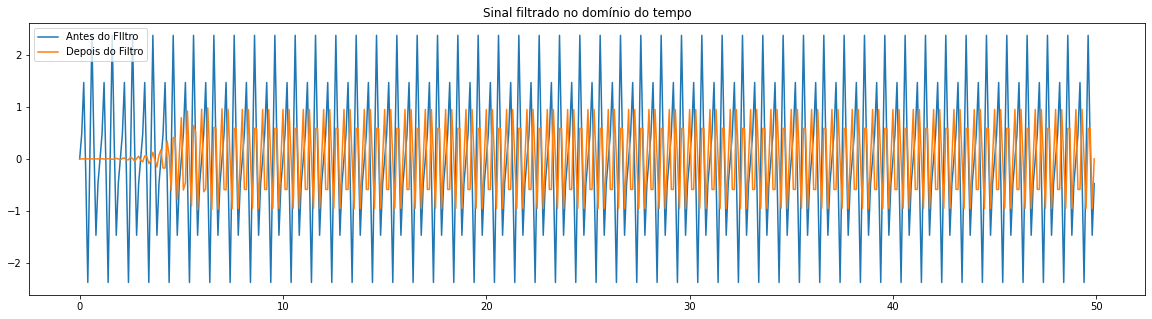

<ipython-input-83-445f306b9c04>:12: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(xt))/len(xt))
<ipython-input-83-445f306b9c04>:13: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(sinalfiltrado[:len(t)])/len(xt)))


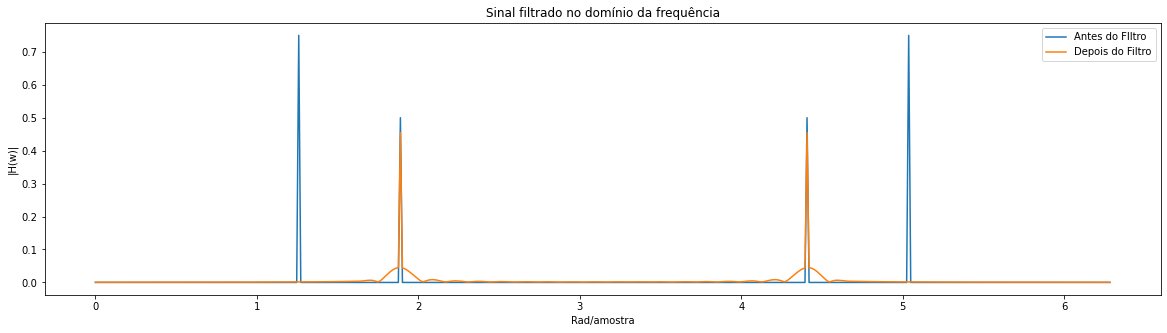

obs: No meu caso, existem dois sinais com a frequ√™ncia de 3hz, portanto, somei os 2


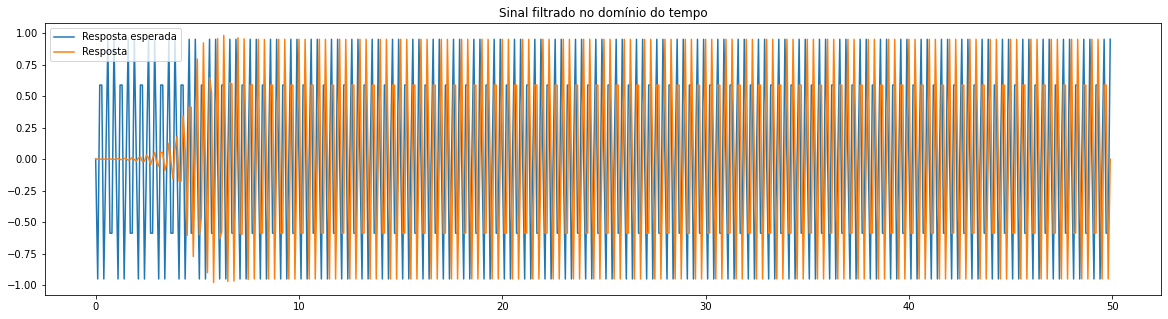

<ipython-input-83-445f306b9c04>:31: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(RespostaIdeal))/len(RespostaIdeal))
<ipython-input-83-445f306b9c04>:32: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(sinalfiltrado[:len(t)])/len(xt)))


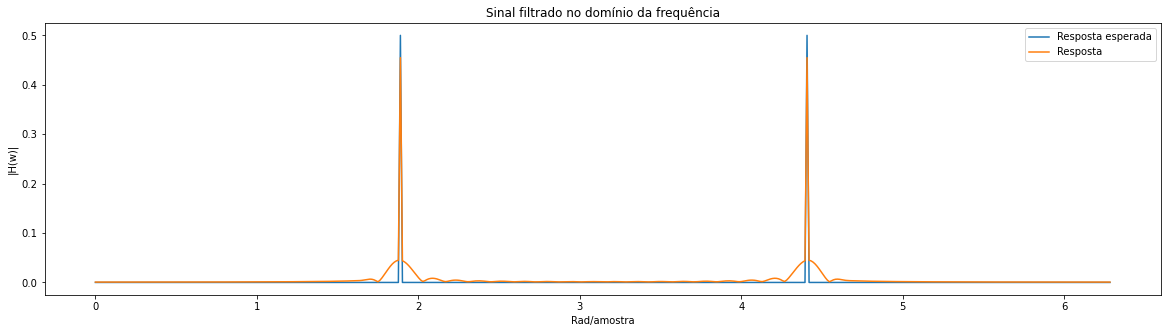

In [83]:
sinalfiltrado=signal.convolve(xt,Filtro)
plt.figure(figsize=(20,5))
plt.title("Sinal filtrado no dom√≠nio do tempo")
plt.plot(t,xt)
plt.plot(t,sinalfiltrado[:len(t)])
plt.legend(("Antes do FIltro","Depois do Filtro"))
plt.show()
plt.figure(figsize=(20,5))
plt.title("Sinal filtrado no dom√≠nio da frequ√™ncia")
plt.ylabel("|H(w)|")
plt.xlabel("Rad/amostra")
plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(xt))/len(xt))
plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(sinalfiltrado[:len(t)])/len(xt)))
plt.legend(("Antes do FIltro","Depois do Filtro"))
plt.show()

RespostaIdeal=-1*np.ùë†ùëñùëõ(2*np.pi*(a1 + a2 )*ùë°)
print("obs: No meu caso, existem dois sinais com a frequ√™ncia de 3hz, portanto, somei os 2")

plt.figure(figsize=(20,5))
plt.title("Sinal filtrado no dom√≠nio do tempo")

plt.plot(t,RespostaIdeal)
plt.plot(t,sinalfiltrado[:len(t)])
plt.legend(("Resposta esperada","Resposta"))
plt.show()
plt.figure(figsize=(20,5))
plt.title("Sinal filtrado no dom√≠nio da frequ√™ncia")
plt.ylabel("|H(w)|")
plt.xlabel("Rad/amostra")
plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(RespostaIdeal))/len(RespostaIdeal))
plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(sinalfiltrado[:len(t)])/len(xt)))
plt.legend(("Resposta esperada","Resposta"))
plt.show()

### Rejeita-faixa (ùë¶ùëè): projeto usando a janela de Kaiser;
As especifica√ß√µes foram feitas de modo que apenas que a frequ√™ncia correspondente √† (ùëé2 + 1) seja filtrada
e n√£o apare√ßa na sa√≠da do filtro;


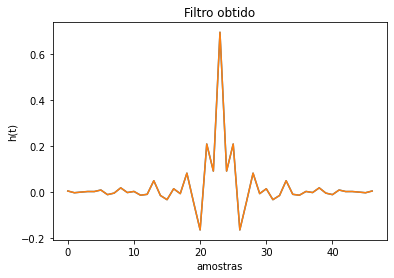

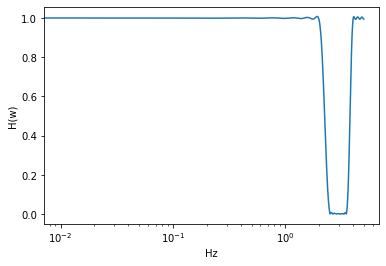

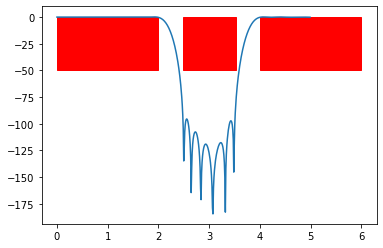

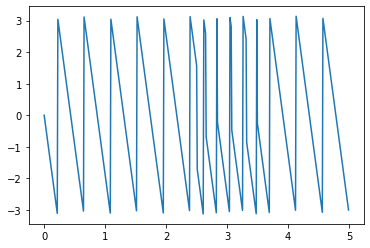

In [84]:
Ap=0.1
Ar=50
Dr=10**(-0.05*Ar)
Dp=(10**(0.05*Ap-1))/(10**(-0.05*Ap+1))
beta=1
numtaps=79
Delta=min(Dr,20*np.log10(Dp))
wp1=((a1+a2-1)*np.pi*2)
wp2=((a1+a2+1)*np.pi*2)
wr1=wp1+3
wr2=wp2-3
wc1=np.mean((wp1,wr1))
wc2=np.mean((wp2,wr2))

##nuttall
numtaps,beta=signal.kaiserord(Delta,min(wc1,wc2))
Filtro=signal.firwin(numtaps+45,cutoff=(wc1,wc2),width=min((wr1-wp1),(wp2-wr2)), window=('kaiser',beta), pass_zero="bandstop",scale=True,nyq=None,fs=(1/T)*np.pi*2)

w,H=signal.freqz(Filtro,fs=(1/T))
plt.plot(Filtro)
plt.ylabel("H(w)")
plt.xlabel("rad/amostras")
plt.title("Filtro obtido")
plt.plot(Filtro)
plt.ylabel("h(t)")
plt.xlabel("amostras")
plt.title("Filtro obtido")
plt.show()
plt.xscale('log')
plt.plot(w,np.abs(H))
plt.ylabel('H(w)')
plt.xlabel('Hz')
plt.show()


plt.fill([0,0.5*wp1/pi,0.5*wp1/pi,0],[-Ar,-Ar,0,0],0.8,c='r')
plt.fill([0.5*wp2/pi,0.5*wp2*1.5/pi,0.5*wp2*1.5/pi,0.5*wp2/pi],[-Ar,-Ar,0,0],0.8,c='r')
plt.fill([0.5*wr1/pi,0.5*wr2/pi,0.5*wr2/pi,0.5*wr1/pi],[-Ar,-Ar,0,0],0.8,c='r')
plt.plot(w,20*np.log(np.abs(H)))
plt.show()
plt.plot(w,np.angle(H))
plt.show()


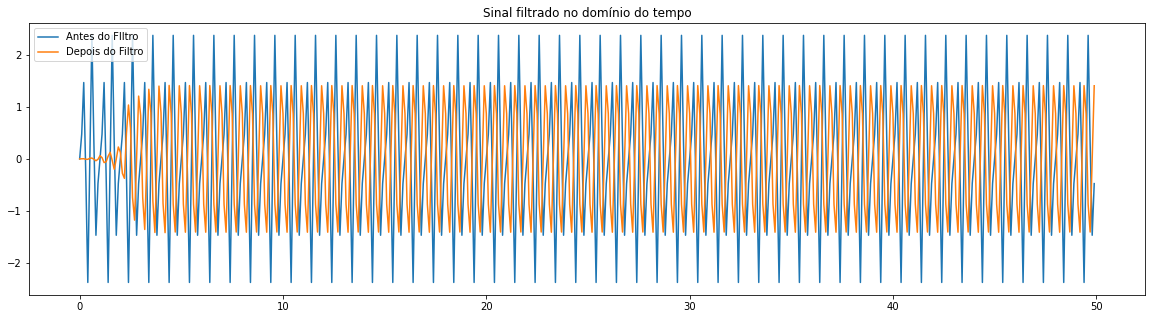

<ipython-input-85-60ad0feab542>:12: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(xt))/len(xt))
<ipython-input-85-60ad0feab542>:13: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(sinalfiltrado[:len(t)])/len(xt)))


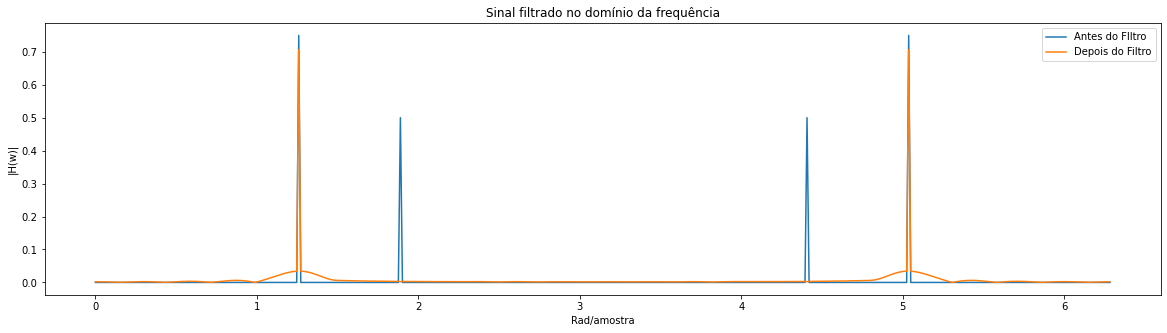

obs: No meu caso, existem dois sinais com a frequ√™ncia de 3hz, portanto, somei os 2


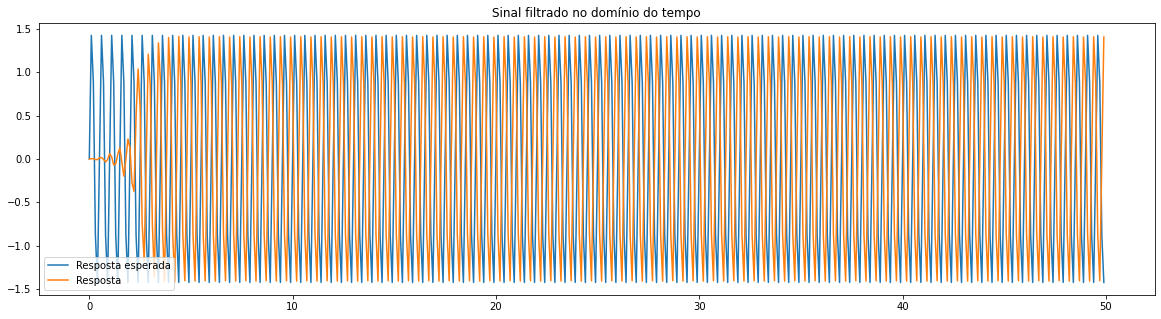

<ipython-input-85-60ad0feab542>:31: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(RespostaIdeal))/len(RespostaIdeal))
<ipython-input-85-60ad0feab542>:32: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(sinalfiltrado[:len(t)])/len(xt)))


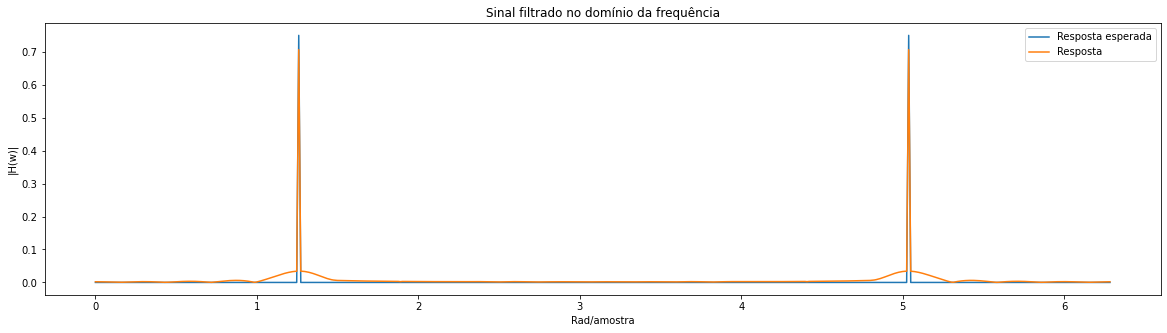

In [85]:
sinalfiltrado=signal.convolve(xt,Filtro)
plt.figure(figsize=(20,5))
plt.title("Sinal filtrado no dom√≠nio do tempo")
plt.plot(t,xt)
plt.plot(t,sinalfiltrado[:len(t)])
plt.legend(("Antes do FIltro","Depois do Filtro"))
plt.show()
plt.figure(figsize=(20,5))
plt.ylabel("|H(w)|")
plt.xlabel("Rad/amostra")
plt.title("Sinal filtrado no dom√≠nio da frequ√™ncia")
plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(xt))/len(xt))
plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(sinalfiltrado[:len(t)])/len(xt)))
plt.legend(("Antes do FIltro","Depois do Filtro"))
plt.show()

RespostaIdeal=1.5*np.ùë†ùëñùëõ(2*np.pi*(a1 + 1 )*ùë°)
print("obs: No meu caso, existem dois sinais com a frequ√™ncia de 3hz, portanto, somei os 2")

plt.figure(figsize=(20,5))
plt.title("Sinal filtrado no dom√≠nio do tempo")

plt.plot(t,RespostaIdeal)
plt.plot(t,sinalfiltrado[:len(t)])
plt.legend(("Resposta esperada","Resposta"))
plt.show()
plt.figure(figsize=(20,5))
plt.title("Sinal filtrado no dom√≠nio da frequ√™ncia")
plt.ylabel("|H(w)|")
plt.xlabel("Rad/amostra")
plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(RespostaIdeal))/len(RespostaIdeal))
plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(sinalfiltrado[:len(t)])/len(xt)))
plt.legend(("Resposta esperada","Resposta"))
plt.show()

## B - PROJETO DE FILTROS IIR
Projete os mesmos filtros descritos anteriormente, mas usando filtros IIR. Compare os resultados no dom√≠nio do
tempo e da frequ√™ncia. Nas conclus√µes voc√™ deve apontar as principais diferen√ßas entre os filtros FIR e IIR.



## Filtro Passa altas IIR

25.78384463570133 27.527638409423467 60 0.1
Ordem do filtro:  10 Frequ√™ncia Natural : 27.527638409423467 rad/amostra
27.527638409423467


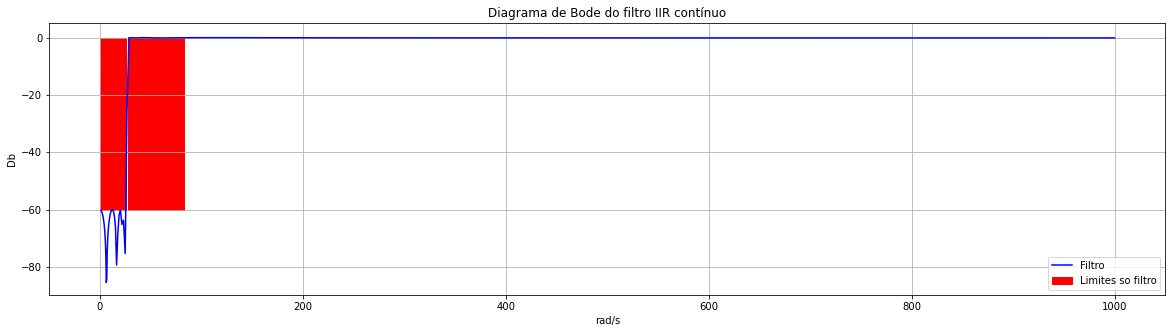

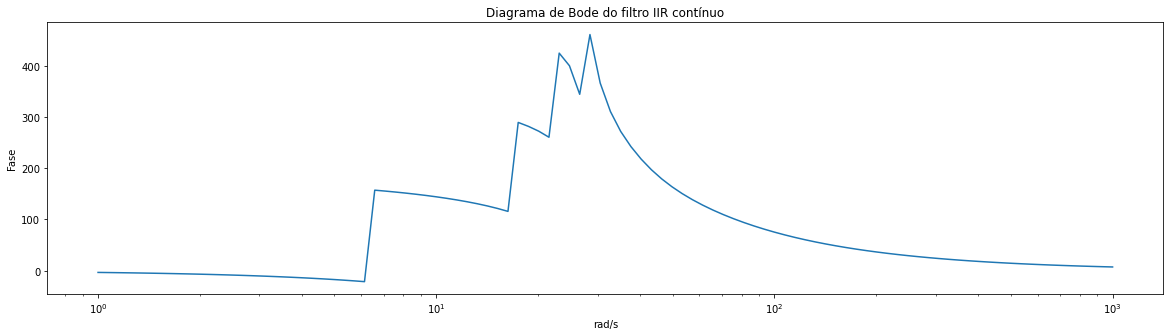

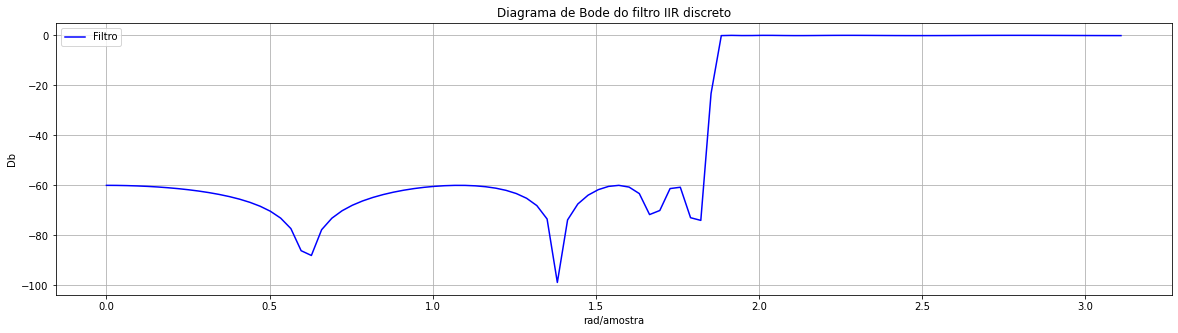

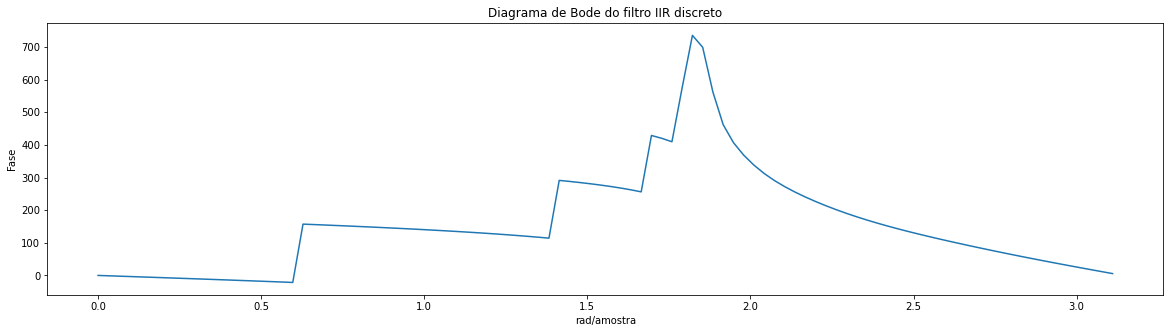

In [86]:


# Especifica√ß√µes do filtro
ws=np.pi*2/T
wr=2*np.pi*(a2+a1-0.1)
wp=2*np.pi*(a2+a1)
Ap=0.1
Ar=60

# Frequ√™ncias em sistemas discretos
wrD=wr*2*np.pi/ws
wpD=wp*2*np.pi/ws

# Pr√© distorcer as frequencias
wraD= (2/T)*np.tan(wrD/2)
wpaD=(2/T)*np.tan(wpD/2)

print(wraD,wpaD,Ar,Ap)
N1,Wn1=signal.ellipord(wp=np.abs(wpaD), ws=np.abs(wraD), gpass=Ap, gstop=Ar, analog=True)
print("Ordem do filtro: ", N1, "Frequ√™ncia Natural :", Wn1,"rad/amostra")

print(wpaD)
num,den= signal.ellip( N1,rp=Ap,rs=Ar,Wn=Wn1,btype='hp',analog=True,output='ba',fs=None,)

IIR_Filtro=signal.lti(num,den)

w,mag,phase=signal.bode(IIR_Filtro)
plt.figure(figsize=(20,5))
plt.plot(w,mag,c='b')
plt.title("Diagrama de Bode do filtro IIR cont√≠nuo")
plt.xlabel('rad/s')
plt.ylabel('Db')
plt.fill([0,wraD,wraD,0],[-Ar,-Ar,0,0],0.8,c='r')
plt.fill([wpaD,wpaD*3,wpaD*3,wpaD],[-60,-60,-Ap,-Ap],0.8,c='r')
plt.legend(['Filtro','Limites so filtro'])
plt.grid()

plt.show()

plt.figure(figsize=(20,5))
plt.title("Diagrama de Bode do filtro IIR cont√≠nuo")
plt.xlabel('rad/s')
plt.ylabel('Fase')
plt.plot(w,phase)
plt.xscale('log')
plt.show()

from scipy import signal

numd,dend=signal.bilinear(num, den, fs)
IIR_FILTROHPD=signal.dlti(numd,dend)
w,mag,phase=signal.dbode(IIR_FILTROHPD)

#IIR_FILTROD=signal.cont2discrete(IIR_Filtro,T)
plt.figure(figsize=(20,5))
plt.plot(w,mag,c='b')

plt.title("Diagrama de Bode do filtro IIR discreto")
plt.xlabel('rad/amostra')
plt.ylabel('Db')
plt.legend(['Filtro','Limites do filtro'])
plt.grid()
plt.show()
plt.figure(figsize=(20,5))
plt.title("Diagrama de Bode do filtro IIR discreto")
plt.xlabel('rad/amostra')
plt.ylabel('Fase')
plt.plot(w,phase)
plt.show()


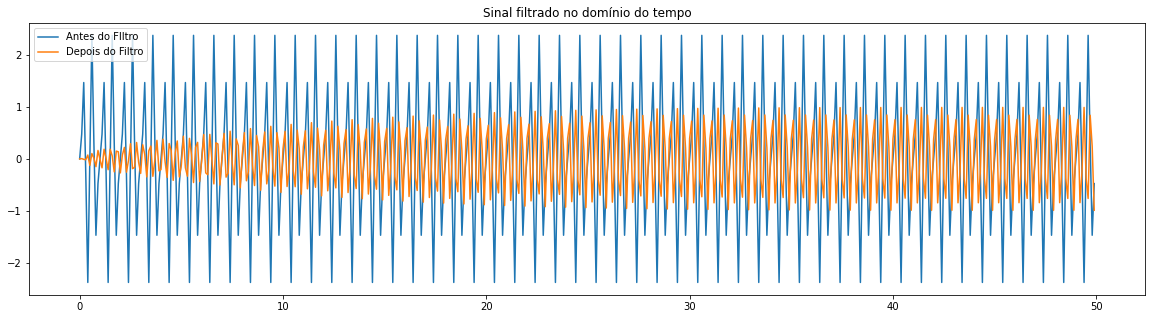

<ipython-input-87-852c0162918e>:12: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(xt))/len(xt))
<ipython-input-87-852c0162918e>:13: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(sinalfiltrado[:len(t)])/len(xt)))


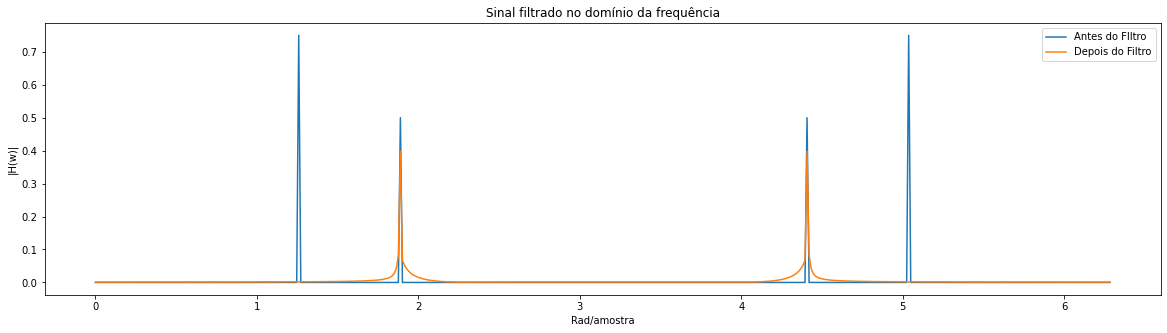

obs: No meu caso, existem dois sinais com a frequ√™ncia de 3hz, portanto, somei os 2


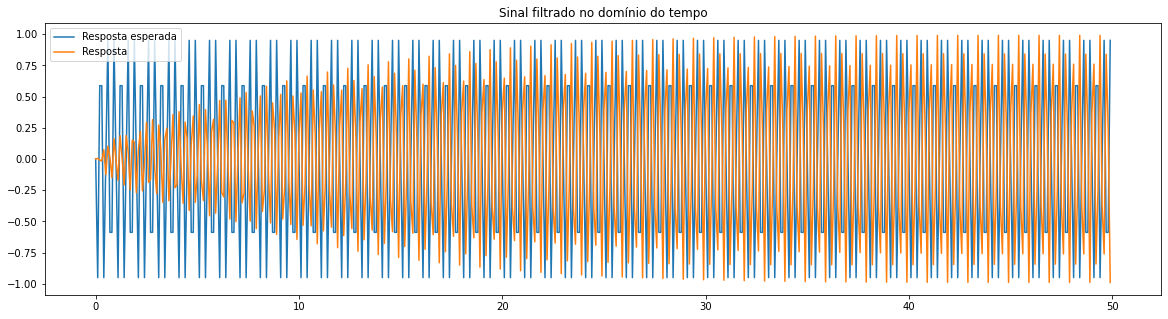

<ipython-input-87-852c0162918e>:31: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(RespostaIdeal))/len(RespostaIdeal))
<ipython-input-87-852c0162918e>:32: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(sinalfiltrado[:len(t)])/len(xt)))


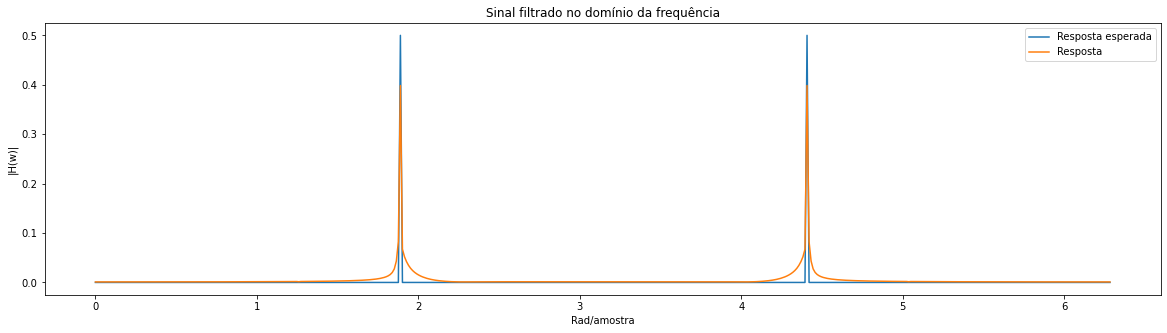

In [87]:

sinalfiltrado=signal.lfilter(numd,dend,xt)
plt.figure(figsize=(20,5))
plt.title("Sinal filtrado no dom√≠nio do tempo")
plt.plot(t,xt)
plt.plot(t,sinalfiltrado[:len(t)])
plt.legend(("Antes do FIltro","Depois do Filtro"))
plt.show()
plt.figure(figsize=(20,5))
plt.ylabel("|H(w)|")
plt.xlabel("Rad/amostra")
plt.title("Sinal filtrado no dom√≠nio da frequ√™ncia")
plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(xt))/len(xt))
plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(sinalfiltrado[:len(t)])/len(xt)))
plt.legend(("Antes do FIltro","Depois do Filtro"))
plt.show()

RespostaIdeal=-1*np.ùë†ùëñùëõ(2*np.pi*(a1 + a2 )*ùë°)
print("obs: No meu caso, existem dois sinais com a frequ√™ncia de 3hz, portanto, somei os 2")

plt.figure(figsize=(20,5))
plt.title("Sinal filtrado no dom√≠nio do tempo")

plt.plot(t,RespostaIdeal)
plt.plot(t,sinalfiltrado[:len(t)])
plt.legend(("Resposta esperada","Resposta"))
plt.show()
plt.figure(figsize=(20,5))
plt.title("Sinal filtrado no dom√≠nio da frequ√™ncia")
plt.ylabel("|H(w)|")
plt.xlabel("Rad/amostra")
plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(RespostaIdeal))/len(RespostaIdeal))
plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(sinalfiltrado[:len(t)])/len(xt)))
plt.legend(("Resposta esperada","Resposta"))
plt.show()

### Filtro passa rejeita faixa IIR

[20.404054008643175, 38.300488965751704] [19.999999999999996, 39.25221011010301] 60 0.1
Ordem do filtro:  10 Frequ√™ncia Natural : [20.00000631 39.07425435] rad/amostra
[19.999999999999996, 39.25221011010301]


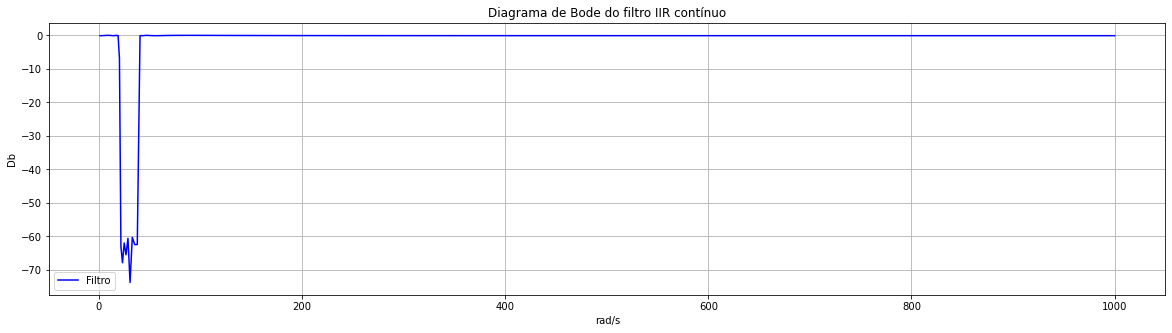

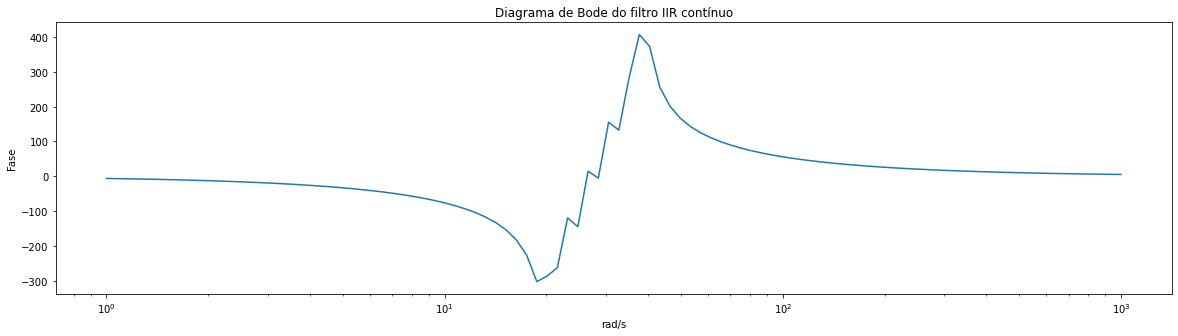

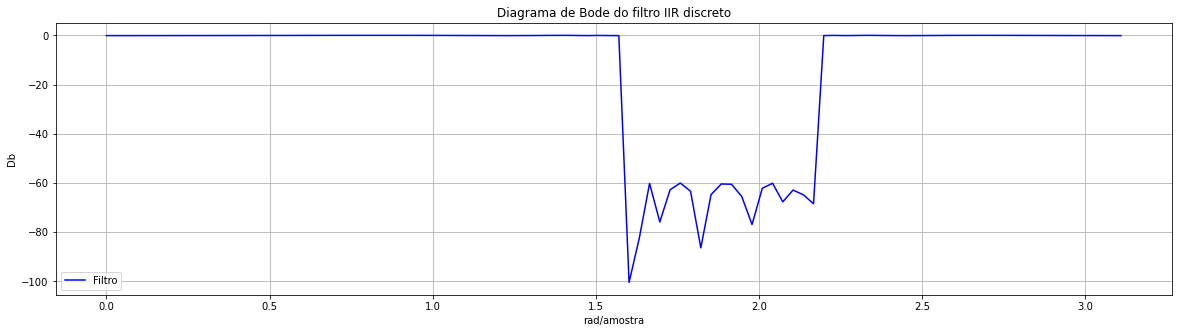

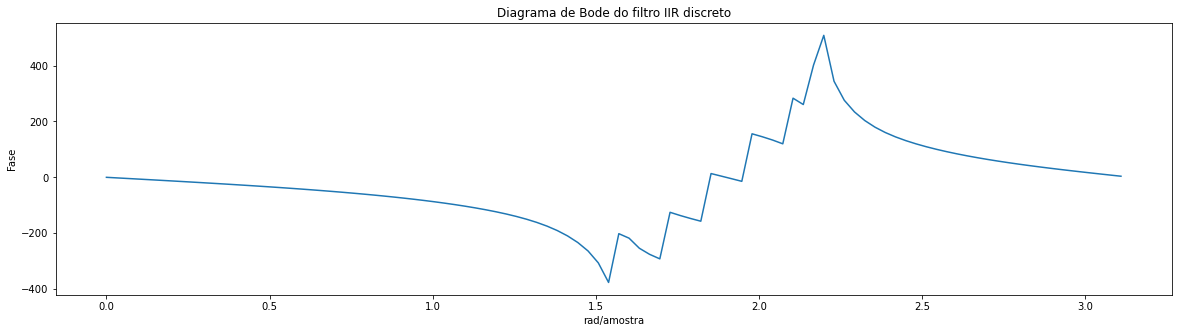

In [88]:


# Especifica√ß√µes do filtro
ws=np.pi*2/T
wp=[2*np.pi*(a1+a2-0.5),2*np.pi*(a2+a1+0.5)]
wr=[wp[0]+0.2,wp[1]-0.2]
Ap=0.1
Ar=60

# Frequ√™ncias em sistemas discretos
wrD=[wr[0]*2*np.pi/ws,wr[1]*2*np.pi/ws]
wpD=[wp[0]*2*np.pi/ws,wp[1]*2*np.pi/ws]

# Pr√© distorcer as frequencias
wraD= [(2/T)*np.tan(wrD[0]/2),(2/T)*np.tan(wrD[1]/2)]
wpaD=[(2/T)*np.tan(wpD[0]/2),(2/T)*np.tan(wpD[1]/2)]

print(wraD,wpaD,Ar,Ap)
N1,Wn1=signal.ellipord(wp=np.abs(wpaD), ws=np.abs(wraD), gpass=Ap, gstop=Ar, analog=True)
print("Ordem do filtro: ", N1, "Frequ√™ncia Natural :", Wn1,"rad/amostra")

print(wpaD)
num,den= signal.ellip( N1,rp=Ap,rs=Ar,Wn=Wn1,btype='bs',analog=True,output='ba',fs=None,)

IIR_Filtro=signal.lti(num,den)

w,mag,phase=signal.bode(IIR_Filtro)
plt.figure(figsize=(20,5))
plt.plot(w,mag,c='b')
plt.title("Diagrama de Bode do filtro IIR cont√≠nuo")
plt.xlabel('rad/s')
plt.ylabel('Db')
# plt.fill([0,wraD,wraD,0],[-Ar,-Ar,0,0],0.8,c='r')
# plt.fill([wpaD,wpaD*3,wpaD*3,wpaD],[-60,-60,-Ap,-Ap],0.8,c='r')
plt.legend(['Filtro','Limites so filtro'])
plt.grid()

plt.show()

plt.figure(figsize=(20,5))
plt.title("Diagrama de Bode do filtro IIR cont√≠nuo")
plt.xlabel('rad/s')
plt.ylabel('Fase')
plt.plot(w,phase)
plt.xscale('log')
plt.show()

from scipy import signal

numd,dend=signal.bilinear(num, den, fs)
IIR_FILTROHPD=signal.dlti(numd,dend)
w,mag,phase=signal.dbode(IIR_FILTROHPD)

#IIR_FILTROD=signal.cont2discrete(IIR_Filtro,T)
plt.figure(figsize=(20,5))
plt.plot(w,mag,c='b')

plt.title("Diagrama de Bode do filtro IIR discreto")
plt.xlabel('rad/amostra')
plt.ylabel('Db')
plt.legend(['Filtro','Limites do filtro'])
plt.grid()
plt.show()
plt.figure(figsize=(20,5))
plt.title("Diagrama de Bode do filtro IIR discreto")
plt.xlabel('rad/amostra')
plt.ylabel('Fase')
plt.plot(w,phase)
plt.show()

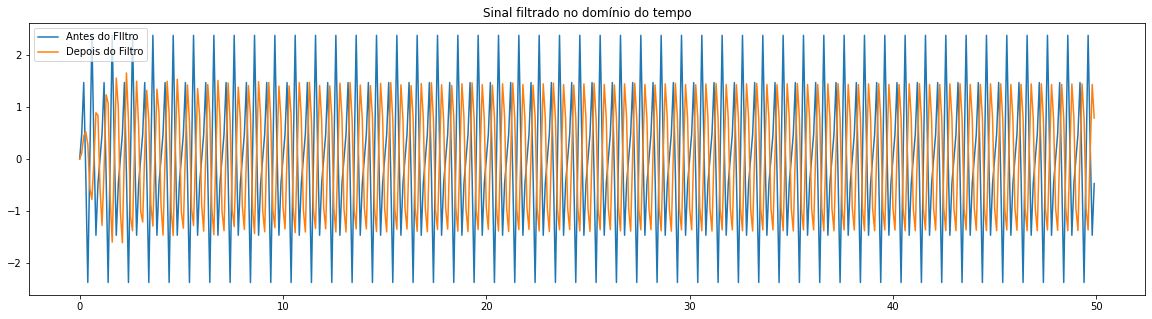

<ipython-input-89-48a6d6722307>:10: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(xt))/len(xt))
<ipython-input-89-48a6d6722307>:11: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(sinalfiltrado[:len(t)])/len(xt)))


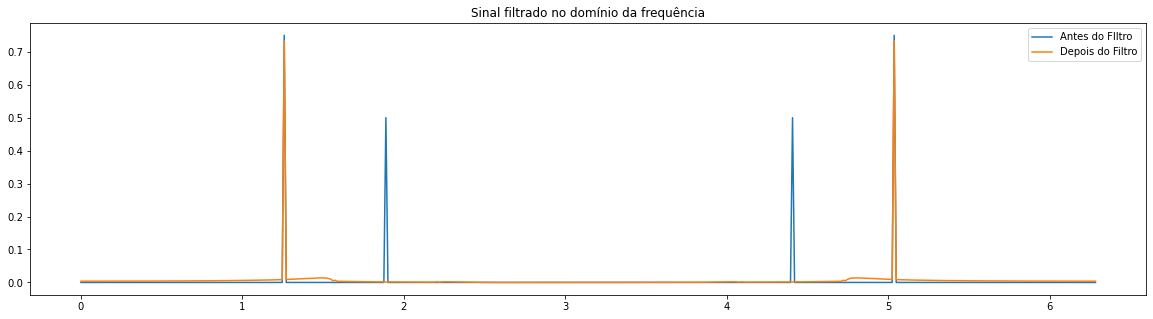

obs: No meu caso, existem dois sinais com a frequ√™ncia de 3hz, portanto, somei os 2


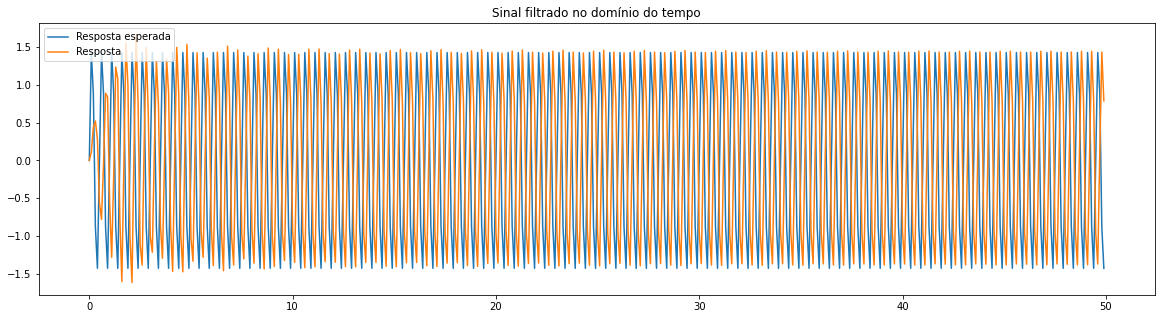

<ipython-input-89-48a6d6722307>:29: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(RespostaIdeal))/len(RespostaIdeal))
<ipython-input-89-48a6d6722307>:30: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(sinalfiltrado[:len(t)])/len(xt)))


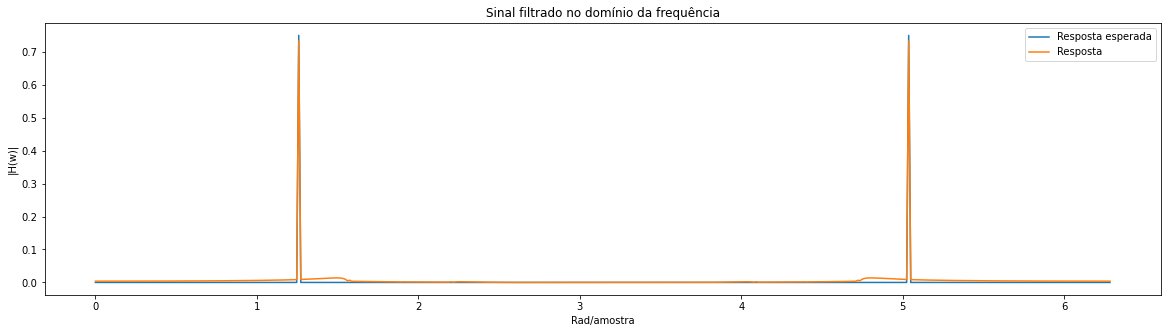

In [89]:

sinalfiltrado=signal.lfilter(numd,dend,xt)
plt.figure(figsize=(20,5))
plt.title("Sinal filtrado no dom√≠nio do tempo")
plt.plot(t,xt)
plt.plot(t,sinalfiltrado[:len(t)])
plt.legend(("Antes do FIltro","Depois do Filtro"))
plt.show()
plt.figure(figsize=(20,5))
plt.title("Sinal filtrado no dom√≠nio da frequ√™ncia")
plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(xt))/len(xt))
plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(sinalfiltrado[:len(t)])/len(xt)))
plt.legend(("Antes do FIltro","Depois do Filtro"))
plt.show()

RespostaIdeal=1.5*np.ùë†ùëñùëõ(2*np.pi*(a1 + 1 )*ùë°)
print("obs: No meu caso, existem dois sinais com a frequ√™ncia de 3hz, portanto, somei os 2")

plt.figure(figsize=(20,5))
plt.title("Sinal filtrado no dom√≠nio do tempo")

plt.plot(t,RespostaIdeal)
plt.plot(t,sinalfiltrado[:len(t)])
plt.legend(("Resposta esperada","Resposta"))
plt.show()
plt.figure(figsize=(20,5))
plt.title("Sinal filtrado no dom√≠nio da frequ√™ncia")
plt.ylabel("|H(w)|")
plt.xlabel("Rad/amostra")
plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(RespostaIdeal))/len(RespostaIdeal))
plt.plot(2*np.pi*t/t[len(t)-1],np.abs(fft(sinalfiltrado[:len(t)])/len(xt)))
plt.legend(("Resposta esperada","Resposta"))
plt.show()

### Conclus√µes: Utilizando as t√©cnicas aprendidas foi poss√≠vel aplicar os filtros IIR e FIR. Al√©m disso, foi poss√≠vel notar a diferen√ßa de ordem entre os dois. Enquanto o filtro do tipo FIR obteve resultado com ordem de aproximadamente 105, o filtro do tipo IIR eliptico, apesar de seguir especifica√ß√µes mais r√≠gidas, obteve ordem  10.